In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df = pd.read_csv("Travel.csv")

In [198]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## 1. What is the distribution of customerages, and how does age relate to product purchase

In [200]:
df.loc[:,"ProdTaken" : "Age"].head()  # we have null values in age , so let's impute null values by mean of the ages

,ProdTaken,Age
0,1,41.0
1,0,49.0
2,1,37.0
3,0,33.0
4,0,NaN


In [201]:
df['Age'].isnull().sum()   # So we have 226 null values

226

In [202]:
# Filling null values
df["Age"].fillna(value = df["Age"].mean(), inplace = True)

In [203]:
# Dividing age-group
bins = list(range(18, 62, 5))
labels = ['18-22 years', '23-27 years', '28-32 years', '33-37 years', '38-42 years', '43-47 years', '48-52 years', '53-57 years']


df["ageGrp"] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [204]:
ageBins = range(18, 62, 5)

# Use cut method to categorize age into bins
df['ageGrp'] = pd.cut(df['Age'], bins=ageBins)

# Group by age bins and calculate the sum of 'ProdTaken'
prod_taken_by_age = df.groupby('ageGrp')['ProdTaken'].sum().reset_index()

In [205]:
df1 = df.groupby("ageGrp")["ProdTaken"].sum()

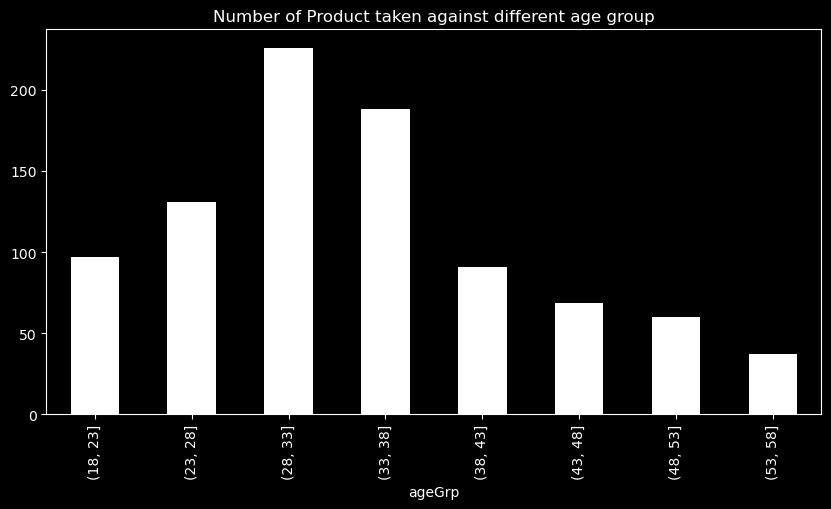

In [206]:
plt.style.use("dark_background")
plt.figure(figsize = (10, 5))
df1.plot(kind='bar',color="white")
plt.title("Number of Product taken against different age group")
plt.show()

In [207]:
df1

ageGrp
(18, 23]     97
(23, 28]    131
(28, 33]    226
(33, 38]    188
(38, 43]     91
(43, 48]     69
(48, 53]     60
(53, 58]     37
Name: ProdTaken, dtype: int64

# Answer

From visual data and from data frame name df1, we can see that , the age group between 28 - 33 are purchasing more product.
So we can conclude that middle aged people have more purchasing power. As age is increasing we can witness the decrease in product purchase. 
If we see the graph carefully than we can see the distribution approximate follows the normal or Gaussian distribution.

<br>

## 2. How does the type of contact(type of contact)influence the likelihood of purchasing a travel product? 

In [208]:
pd.crosstab(df["ProdTaken"], df["TypeofContact"])

TypeofContact,Company Invited,Self Enquiry
ProdTaken,,
0,1109,2837
1,310,607


In [209]:
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [210]:
df["TypeofContact"].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

## 3. Is there a correlation between the city tier(citytier)and monthly income (monthly income) of customers?

In [211]:
print(df["CityTier"].isnull().count(), df["MonthlyIncome"].isnull().count()) # so no null values

4888 4888


<Axes: xlabel='MonthlyIncome', ylabel='CityTier'>

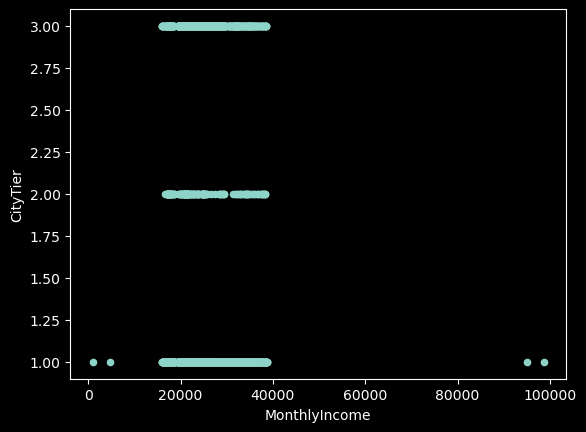

In [212]:
df.plot(kind = "scatter", y = "CityTier", x = "MonthlyIncome")

As we can see there is no direct correlation between city tier and Monthly income. The scatter plot is straight line, means that the coefficient of correlation is 0. 

In [218]:
df2 = df.groupby("CityTier")["MonthlyIncome"].sum()
df2

CityTier
1    70839753.0
2     4564447.0
3    34546218.0
Name: MonthlyIncome, dtype: float64

# Answer

As by grouping data we can see that tier-1 city has highest monthly income, but we can also see that there is no decreasing relation, instead it has minima for tier-2 city and then again it is increasing. And we can see that by following graph:

<Axes: xlabel='CityTier'>

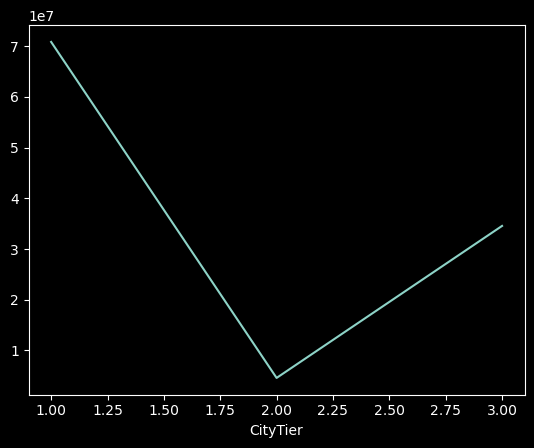

In [220]:
df2.plot(kind='line')

## 4. What is the average duration of a pitch (duration of pitch)for customers who purchased a product versus those who did not?

In [243]:
df3 = df.groupby("ProdTaken")["DurationOfPitch"].mean()
df3.index = ["Product Not Purchased", "Product Purchased"]

In [244]:
df3

Product Not Purchased    15.169325
Product Purchased        16.873143
Name: DurationOfPitch, dtype: float64

## 5. How do occupation types(occupation)distribute among customers,and is there an occupation type that is more likely to purchase a travel product? 

In [275]:
# Distribution of types of occupation among customers
df3 = df["Occupation"].value_counts()
df3

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

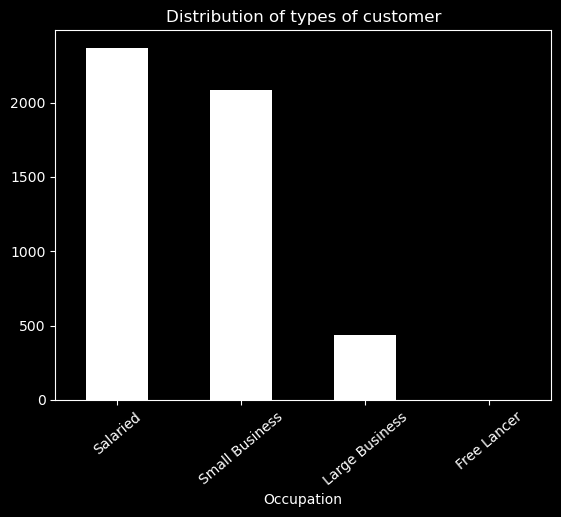

In [283]:
df3.plot(kind="bar", rot=40, color = "white")
plt.title("Distribution of types of customer")
plt.show()

# Answer - 5.1

From graph and by above summarise data in data frame df3, we can clearly say that highest type of occupation from cutomer is salaried type and then small business and free lancers are least.

In [287]:
# Occupation type vs Product purchase
df4 = df.groupby("Occupation")["ProdTaken"].sum()
df4

Occupation
Free Lancer         2
Large Business    120
Salaried          414
Small Business    384
Name: ProdTaken, dtype: int64

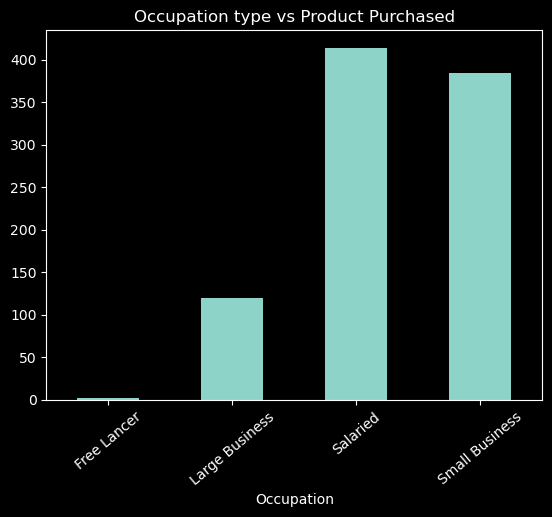

In [288]:
df4.plot(kind="bar", rot=40)
plt.title("Occupation type vs Product Purchased")
plt.show()

# Answer- 5.2

Salaried person are more inclined towards product purchasing.

## 6. Are there any gender-based preferences for the type of product pitched (ProductPitched)? 

In [290]:
df.loc[:, "Gender" : "ProductPitched"]

,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched
0,Female,3,3.0,Deluxe
1,Male,3,4.0,Deluxe
2,Male,3,4.0,Basic
3,Female,2,3.0,Basic
4,Male,2,3.0,Basic
...,...,...,...,...
4883,Male,3,5.0,Deluxe
4884,Male,4,5.0,Basic
4885,Female,4,4.0,Standard
4886,Male,3,4.0,Basic


In [293]:
df["ProductPitched"].unique()  # so we have 5 types in product pitched

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [303]:
df5 = df.pivot_table(values="Gender", index = "ProductPitched",aggfunc="count")
df5

,Gender
ProductPitched,
Basic,1842
Deluxe,1732
King,230
Standard,742
Super Deluxe,342
